In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rowID-ra szukseg lesz
season idk
day_in_period - melyik nap
holyday-e
weekday
ke (ezt kell kifizetni ha aznap kersz aramot) es hupx (egy napre elore ar)
afrr_fel es le - abban a negyed oraban mennyit kellett varialni a halozatot
solar es rendszerize
target_flag
target_reg

In [3]:
pub = pd.read_csv("_data/public_data.csv")

pub

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg
0,0,1,18,0,0,0,False,2,899.343121,287.7194,0.0000,-103.196933,0.0,0.0,-212.845947,0.0,6514.140945,0.0,-100.188708
1,1,1,18,0,0,15,False,2,899.374587,287.7194,55.9286,-5.617200,0.0,0.0,263.427160,0.0,6482.184545,0.0,-100.292441
2,2,1,18,0,0,30,False,2,899.303875,287.7194,69.6826,-9.355800,0.0,0.0,273.927320,0.0,6310.363525,0.0,-100.059327
3,3,1,18,0,0,45,False,2,899.299787,287.7194,30.2718,-16.943567,0.0,0.0,132.621040,0.0,6158.798885,0.0,-100.045850
4,4,1,18,0,1,0,False,2,897.436947,283.6309,25.9714,-12.064167,0.0,0.0,151.888080,0.0,6137.148085,0.0,-104.954619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89755,93260,11,194,4,22,45,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5256.726477,NaN,NaN
89756,93261,11,194,4,23,0,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5228.971040,NaN,NaN
89757,93262,11,194,4,23,15,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5203.779573,NaN,NaN
89758,93263,11,194,4,23,30,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5180.754317,NaN,NaN


In [4]:
minta = pd.read_csv("_data/minta_beadando_rand.csv")

minta


,rowID,prediction
0,384,0.374540
1,385,0.950714
2,386,0.731994
3,387,0.598658
4,388,0.156019
...,...,...
17947,93260,0.573911
17948,93261,0.428135
17949,93262,0.263574
17950,93263,0.760963


In [5]:
# 1. etap - Minden sorbna ismert, nem ID tipusu valtozokra epulo modell

df = pub.copy()

def f(x):
    if x==4:
        return "beadando"
    elif x==3:
        return "test"
    else:
        return "train"


df['train_test_validation']=df['day_in_period'].apply(f)

In [6]:
df['periodID'].nunique()

187

In [7]:
df.columns

Index(['rowID', 'season', 'periodID', 'day_in_period', 'hour', 'minute',
       'holyday', 'weekday', 'ke', 'hupx', 'afrr_fel', 'afrr_le', 'mfrr_fel',
       'mfrr_le', 'afrr', 'solar_becsult_dayahead', 'rendszerterheles_terv',
       'target_flag', 'target_reg', 'train_test_validation'],
      dtype='object')

In [8]:
bemeno_valtozok=['hour', 'minute', 'holyday', 'weekday','solar_becsult_dayahead', 'rendszerterheles_terv']

In [9]:
train_df = df[df['train_test_validation']=='train']
test_df = df[df['train_test_validation']=='test']
bea_df = df[df['train_test_validation']=='beadando']

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [11]:
randF_C = RandomForestClassifier(random_state=42, n_estimators=33, max_depth=7)

randF_R = RandomForestRegressor(random_state=42, n_estimators=33, max_depth=7)

In [12]:
randF_C.fit(train_df[bemeno_valtozok], train_df['target_flag'])
randF_R.fit(train_df[bemeno_valtozok], train_df['target_reg'])

RandomForestRegressor(max_depth=7, n_estimators=33, random_state=42)

In [13]:
test_df=test_df.copy()

In [14]:
test_df['tipp_C1']=randF_C.predict_proba(test_df[bemeno_valtozok])[:,1]

In [15]:
test_df['tipp_R1']=randF_R.predict(test_df[bemeno_valtozok])

<Axes: >

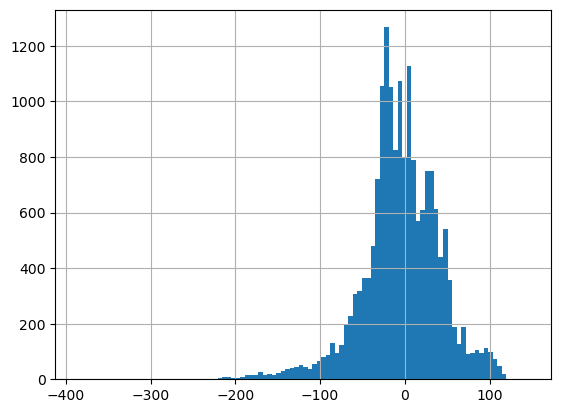

In [16]:
test_df['tipp_R1'].hist(bins=100)

In [17]:
minX = test_df['tipp_R1'].min()
test_df['tipp_R1'] = test_df['tipp_R1']-minX
maxX = test_df['tipp_R1'].max()
test_df['tipp_R1'] = test_df['tipp_R1']/maxX

In [18]:
test_df['tipp_R1'].describe()

count    17952.000000
mean         0.716347
std          0.086671
min          0.000000
25%          0.673458
50%          0.716168
75%          0.772667
max          1.000000
Name: tipp_R1, dtype: float64

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
roc_auc_score(test_df['target_flag'], test_df['tipp_C1'])

0.6216900819921153

In [21]:
roc_auc_score(test_df['target_flag'], test_df['tipp_R1'])

0.5981259566486747

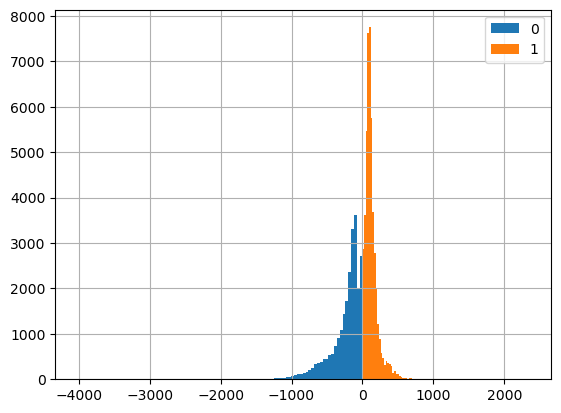

In [22]:
for i in [0,1]:
    cdf = df[df['target_flag']==i]
    cdf['target_reg'].hist(bins=100, label=str(i))
plt.legend()

In [23]:
bea_df = bea_df.copy()

In [24]:
bea_df['prediction']=randF_C.predict_proba(bea_df[bemeno_valtozok])[:,1]

In [25]:
bea_df=bea_df['rowID','prediction']


KeyError: ('rowID', 'prediction')